### Modeling DAQUAR
* [Dataset](https://www.mpi-inf.mpg.de/departments/computer-vision-and-machine-learning/research/vision-and-language/visual-turing-challenge)

* [Original Paper](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://proceedings.neurips.cc/paper_files/paper/2014/file/d516b13671a4179d9b7b458a6ebdeb92-Paper.pdf)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import process_labels, split_data
from src.classifiers_base import preprocess_df

from transformers import BertTokenizer

from src.multimodal_data_loader import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_base import train_early_fusion, train_late_fusion

In [2]:
PATH = 'datasets/coco-qa/'

In [3]:
text_path = os.path.join(PATH, 'labels.csv')
images_path = os.path.join(PATH, 'images')

## Get data

In [4]:
df = pd.read_csv(text_path)
df

,questions,image_id,answers,types,split
0,what is using umbrellas as a central theme,397899,sculpture,0,train
1,what walks toward the rope perimeter fence,310683,elephant,0,train
2,what is the color of the horses,23004,brown,2,train
3,where is the black cat laying down,117931,sink,3,train
4,what is the color of the character,220218,purple,2,train
...,...,...,...,...,...
117679,what are there grouped together here,406426,vegetables,0,test
117680,what serves as the train trestle,545581,bridge,0,test
117681,what is the color of the plate,40404,white,2,test
117682,what is sleeping on the blue couch,570521,cat,0,test


## Data Perparation

In [5]:
# Select features and labels vectors
text_columns = 'questions'
image_columns = 'image_id'
label_columns = 'answers'

df = preprocess_df(df, image_columns, images_path)

# Split the data
train_df, test_df = split_data(df)

# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)

100%|██████████| 117684/117684 [01:06<00:00, 1771.24it/s]


Train Shape: (78736, 5)
Test Shape: (38948, 5)


In [6]:
train_df

,questions,image_id,answers,types,split
0,what is using umbrellas as a central theme,datasets/coco-qa/images/000000397899.jpg,sculpture,0,train
1,what walks toward the rope perimeter fence,datasets/coco-qa/images/000000310683.jpg,elephant,0,train
2,what is the color of the horses,datasets/coco-qa/images/000000023004.jpg,brown,2,train
3,where is the black cat laying down,datasets/coco-qa/images/000000117931.jpg,sink,3,train
4,what is the color of the character,datasets/coco-qa/images/000000220218.jpg,purple,2,train
...,...,...,...,...,...
78731,where are diced meat and tomatoes mixed with c...,datasets/coco-qa/images/000000111606.jpg,bowl,3,train
78732,what is parked at the airport and loading people,datasets/coco-qa/images/000000443687.jpg,airplane,0,train
78733,what cut into two with soup,datasets/coco-qa/images/000000279104.jpg,sandwich,0,train
78734,where is the white toilet sitting,datasets/coco-qa/images/000000534974.jpg,bathroom,3,train


In [7]:
# Instantiate tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [8]:
train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

### Models

In [9]:
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:
The number of parameters of the model are: 252462
Epoch 1/10 - Test Accuracy: 0.5227
Epoch 1/10 - Training Time: 2160.61 seconds | Inference Time: 1051.31 seconds
Epoch 2/10 - Test Accuracy: 0.5429
Epoch 2/10 - Training Time: 2300.63 seconds | Inference Time: 1084.81 seconds
Epoch 3/10 - Test Accuracy: 0.5513
Epoch 3/10 - Training Time: 2340.21 seconds | Inference Time: 1073.28 seconds
Epoch 4/10 - Test Accuracy: 0.5547
Epoch 4/10 - Training Time: 2294.37 seconds | Inference Time: 1083.68 seconds
Epoch 5/10 - Test Accuracy: 0.5591
Epoch 5/10 - Training Time: 2310.51 seconds | Inference Time: 1060.02 seconds
Epoch 6/10 - Test Accuracy: 0.5629
Epoch 6/10 - Training Time: 2293.02 seconds | Inference Time: 1073.36 seconds
Epoch 7/10 - Test Accuracy: 0.5628
Epoch 7/10 - Training Time: 2286.28 seconds | Inference Time: 1021.40 seconds
Epoch 8/10 - Test Accuracy: 0.5603
Epoch 8/10 - Training Time: 2298.00 seconds | Inference Time: 1067.64 seconds
Epoch 9/10 - Test

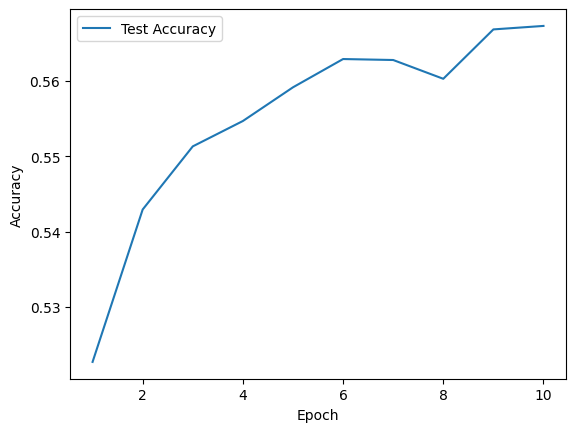

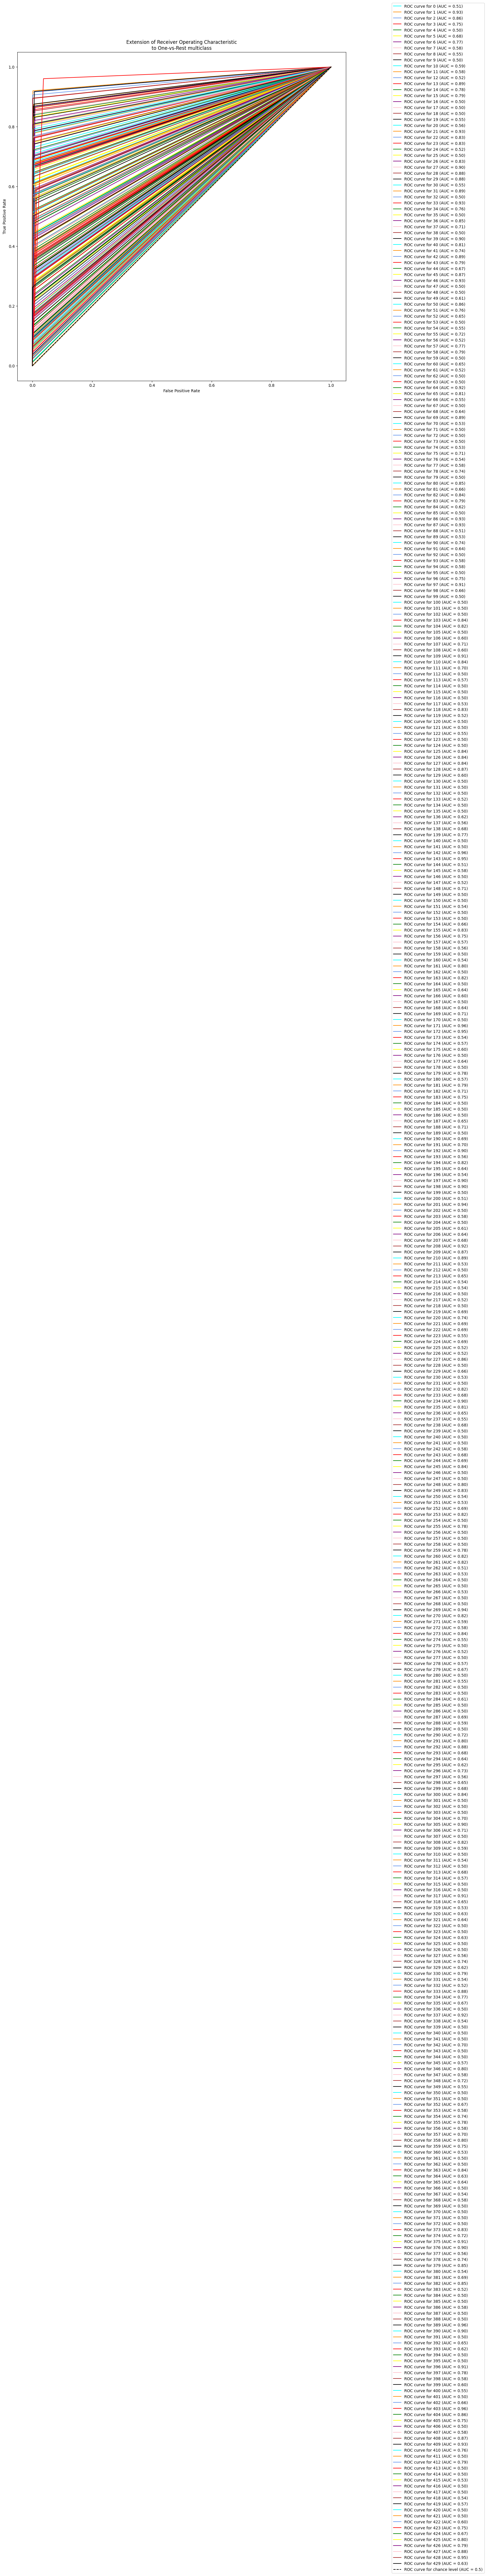

              precision    recall  f1-score   support

           0       0.25      0.02      0.04        41
           1       0.63      0.87      0.73       439
           2       0.69      0.72      0.70       163
           3       0.70      0.50      0.58        32
           4       0.00      0.00      0.00        15
           5       0.50      0.35      0.41        34
           6       0.59      0.55      0.57        31
           7       0.40      0.17      0.24        12
           8       0.33      0.10      0.15        10
           9       0.00      0.00      0.00        21
          10       0.50      0.18      0.27        11
          11       0.16      0.15      0.16        52
          12       0.08      0.03      0.05        29
          13       0.72      0.78      0.75       309
          14       0.43      0.57      0.49       116
          15       0.61      0.59      0.60        97
          16       0.00      0.00      0.00         7
          17       0.00    

In [10]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, output_size, num_epochs=10, multilabel=multilabel, report=True, set_weights=False)

In [ ]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, output_size, num_epochs=10, multilabel=multilabel, report=True, set_weights=False)

Training Late Fusion Model:
The number of parameters of the model are: 154158
Epoch 1/10 - Test Accuracy: 0.5204
Epoch 1/10 - Training Time: 2129.65 seconds | Inference Time: 1041.02 seconds
